In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
csvpath_mouse = os.path.join('data','mouse_drug_data.csv')
csvpath_clinical=os.path.join('data','clinicaltrial_data.csv' )  


# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(csvpath_mouse)
clinical_data=pd.read_csv(csvpath_clinical)

# Combine the data into a single dataset
drug_trial_data = pd.merge(mouse_data, clinical_data, on="Mouse ID", how="outer")

# Display the data table for preview
drug_trial_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [20]:
drug_trial_grouped=drug_trial_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_data_df  = pd.DataFrame(drug_trial_grouped.mean())
tumor_data_df.reset_index(inplace=True)

# Preview DataFrame
tumor_data_df.head(12)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [21]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint & convert to DataFrame
drug_trial_SE=pd.DataFrame(drug_trial_grouped.sem())
drug_trial_SE.reset_index(inplace=True)

# Preview DataFrame
drug_trial_SE.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [22]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_data=tumor_data_df.pivot(index='Timepoint', columns='Drug', values = 'Tumor Volume (mm3)')
pivot_tumor_data=pivot_tumor_data.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)

# Preview that Reformatting worked
pivot_tumor_data.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


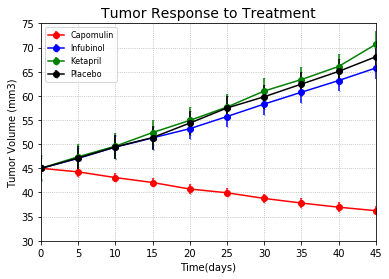

In [23]:
# Generate the Plot (with Error Bars)
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","o","o","o"]

fig, ax = plt.subplots()

for drug in drugs:
    x_data=pivot_tumor_data.index.values
    y_data=pivot_tumor_data[drug] 
    err=sem(pivot_tumor_data[drug])
    
    i=drugs.index(drug)
    
    # Setting up the plot
    ax.errorbar(x_data, y_data,err,linestyle="-",color=colors[i],
                marker=markers[i],capsize=.5,capthick=.5)
    
    # Creating the legend
    ax.legend(loc="upper left", numpoints=1,fontsize=8)

# Setting the grid   
plt.grid(linestyle='dotted')

# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(30,75)

# Setting the title,x_axis and y_axis labels
ax.set_title("Tumor Response to Treatment", fontsize=14)
ax.set_xlabel("Time(days)", fontsize=10)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=10)

# Save the Figure
plt.savefig("Images/Tumor_Response.png")


## Metastatic Response to Treatment

In [24]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_grouped=drug_trial_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites']

met_site_df  = pd.DataFrame(met_site_grouped.mean())
met_site_df.reset_index(inplace=True)


# Preview DataFrame
met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [25]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_SE=pd.DataFrame(met_site_grouped.sem())
met_site_SE.reset_index(inplace=True)

# Preview DataFrame
met_site_SE.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [26]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_site=met_site_df.pivot(index='Timepoint', columns='Drug', values = 'Metastatic Sites')
pivot_met_site=pivot_met_site.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)

# Preview that Reformatting worked
pivot_met_site.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


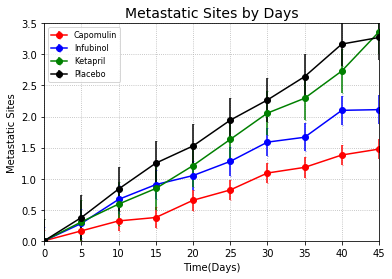

In [27]:
# Generate the Plot (with Error Bars)
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","o","o","o"]

fig, ax = plt.subplots()

for drug in drugs:
    x_data=pivot_met_site.index.values
    y_data=pivot_met_site[drug] 
    err=sem(pivot_met_site[drug])
    
    i=drugs.index(drug)
    
    # Setting up the plot
    ax.errorbar(x_data, y_data,err,linestyle="-",color=colors[i],
                marker=markers[i],capsize=.5,capthick=.5)
    # Creating the legend
    ax.legend(loc="upper left", numpoints=1,  fontsize=8)

# Setting the grid   
plt.grid(linestyle='dotted')

# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(0,3.5)

# Setting the title,x_axis and y_axis labels
ax.set_title("Metastatic Sites by Days", fontsize=14)
ax.set_xlabel("Time(Days)", fontsize=10)
ax.set_ylabel("Metastatic Sites", fontsize=10)

#Save Plot
plt.savefig("Images/Metastatic_Sites.png")

## Survival Rates

In [28]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_grouped=drug_trial_data.groupby(['Drug', 'Timepoint'])['Mouse ID']

survival_df = pd.DataFrame(survival_grouped.count())

survival_df.reset_index(inplace=True)
survival_df=survival_df.rename(columns={"Mouse ID":"Mouse Count"})


# Preview DataFrame
survival_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [29]:
# Minor Data Munging to Re-Format the Data Frames
pivot_survival=survival_df.pivot(index='Timepoint', columns='Drug', values = 'Mouse Count')
pivot_survival=pivot_survival.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)

# Preview that Reformatting worked
pivot_survival.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


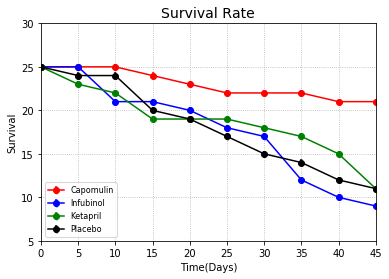

In [30]:
# Generate the Plot (Accounting for percentages)
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","o","o","o"]

fig, ax = plt.subplots()

for drug in drugs:
    x_data=pivot_survival.index.values
    y_data=pivot_survival[drug] 
    
    i=drugs.index(drug)
    
    # Setting up the plot
    ax.errorbar(x_data, y_data,err,linestyle="-",color=colors[i],
                marker=markers[i],capsize=.5,capthick=.5)
    
    # Creating the legend
    ax.legend(loc="lower left", fancybox=True,numpoints=1, fontsize=8)

# Setting the grid   
plt.grid(linestyle='dotted')

# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(5,30)

# Setting the title,x_axis and y_axis labels
ax.set_title("Survival Rate", fontsize=14)
ax.set_xlabel("Time(Days)", fontsize=10)
ax.set_ylabel("Survival", fontsize=10)

#Save Plot
plt.savefig("Images/Survival.png")

## Summary Bar Graph

In [31]:
# Calculate the percent changes for each drug
percent_change=round(((pivot_tumor_data.iloc[9,:]-pivot_tumor_data.iloc[0,:])*100
                      /pivot_tumor_data.iloc[0,:]),0).to_frame()
percent_change=percent_change.rename(columns={0:"% Change"})

# Display the data to confirm
percent_change

,% Change
Drug,
Capomulin,-19.0
Infubinol,46.0
Ketapril,57.0
Placebo,51.0


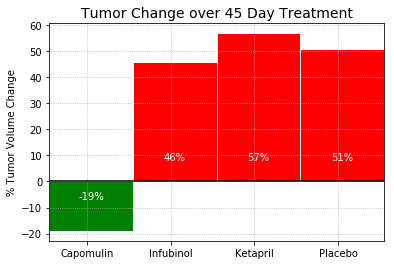

In [32]:
x_axis=percent_change.index.values
y_axis=percent_change["% Change"]

# Splice the data between passing and failing drugs
percent_change['Passing']=percent_change['% Change']<0.0

# Orient widths. Add labels, tick marks, etc. 
fig,ax=plt.subplots()

#Setting the plot and assigning the color based on the Positive or not value
bars=ax.bar(x_axis,y_axis,align="edge",width=1,linewidth=1,
            edgecolor=percent_change.Passing.map({True: 'white', False: 'white'}),
            color=percent_change.Passing.map({True: 'green', False: 'red'}))

tick_locations = [value+0.45 for value in range(len(x_axis))]
ax.set_xticks(tick_locations)

# Assign the height based on the positive calue
height = percent_change.Passing.map({True: 5, False: -5})

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., height[bars.index(bar)]*-1.5,
            str(int(percent_change["% Change"][bars.index(bar)]))+"%",
                ha='center', va='bottom', color='white')
    
# Setting the axis limits
ax.set_xlim(0, len(x_axis))
plt.hlines(0,0,len(x_axis))

# Setting the title,x_axis and y_axis labels
ax.set_title("Tumor Change over 45 Day Treatment", fontsize=14)
ax.set_ylabel("% Tumor Volume Change", fontsize=10)

# Setting the grid line
plt.grid(linestyle='dotted')

# Save the Figure
plt.savefig("Images/Tumor_Change.png")

fig.show()
